<h1 style="text-align:center"> Diabetes Diagnosis using Machine Learning</h1>
<img src="https://img.graphicsurf.com/2020/08/diabetes-vector-free-flat-illustration.jpg" alt="Diabetes" width = "500"/>

## 1. Load libraries:

In [1]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


_______________
## 2. Data Cleaning

In [3]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<p  style="text-align:justify">
    
**The datasets consist of several medical predictor (independent) variables and one target (dependent) variable --> Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.**
<p  style="text-align:justify">

In [4]:
print("dimension of diabetes data: {}".format(diabetes_data.shape))

dimension of diabetes data: (768, 9)


*The diabetes dataset consists of 768 data points, with 9 features*

**Checking for missing values**

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Check the type of 'data'
type(diabetes_data)

pandas.core.frame.DataFrame

In [8]:
# Get row indices 
diabetes_data_row_idx = diabetes_data.index
diabetes_data_row_idx

RangeIndex(start=0, stop=768, step=1)

In [9]:
# Get data type for each attribute 
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* **Minimum values for many variables are 0.**
* **As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have been coded as zeros.**
* **So we need to find out how many Zero values are included in each variable.**

In [11]:
## Counting cells with 0 Values for each variable and publishing the counts below
(diabetes_data.Pregnancies == 0).sum(),(diabetes_data.Glucose==0).sum(),(diabetes_data.BloodPressure==0).sum(),(diabetes_data.SkinThickness==0).sum(),(diabetes_data.Insulin==0).sum(),(diabetes_data.BMI==0).sum(),(diabetes_data.DiabetesPedigreeFunction==0).sum(),(diabetes_data.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

* As Zero Counts of some the variables are as high as 374 and 227, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (except Pregnancies & Outcome)
* We’ll drop 0 values and create a our new dataset which can be used for further analysis

In [12]:
drop_Glu = diabetes_data.index[diabetes_data.Glucose == 0].tolist()
drop_BP = diabetes_data.index[diabetes_data.BloodPressure == 0].tolist()
drop_Skin = diabetes_data.index[diabetes_data.SkinThickness == 0].tolist()
drop_Ins = diabetes_data.index[diabetes_data.Insulin == 0].tolist() 
drop_BMI = diabetes_data.index[diabetes_data.BMI == 0].tolist()

In [13]:
# Creating a dataset called 'dia' from original dataset 'diabetes_data' 
# with excludes all rows with have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.

c = drop_Glu + drop_BP + drop_Skin + drop_Ins + drop_BMI
dia = diabetes_data.drop(diabetes_data.index[c])

In [14]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


* **As in above, we created a cleaned up list titled “dia” which has 392 rows of data instead of 768 from original list.**
* **It looks like we lost nearly 50% of data but our data set is now cleaner than before.**
* **In fact, the removed values can be used for Testing during modeling. So actually we haven’t really lost them completly.**

## 2.1 Performing Preliminary Descriptive Stats on the Data set

In [15]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.2 Split the data frame into two sub sets for convenience of analysis

> As we wish to study the influence of each variable on Outcome (Diabetic or not), we can subset the data by Outcome
> * dia1 Subset : All samples with 1 values of Outcome
> * dia0 Subset : All samples with 0 values of Outcome

In [16]:
dia1 = dia[dia.Outcome == 1]
dia0 = dia[dia.Outcome == 0]

## 2.3 Visualize variables

Text(0.5, 1.0, 'Count Plot for Outcome')

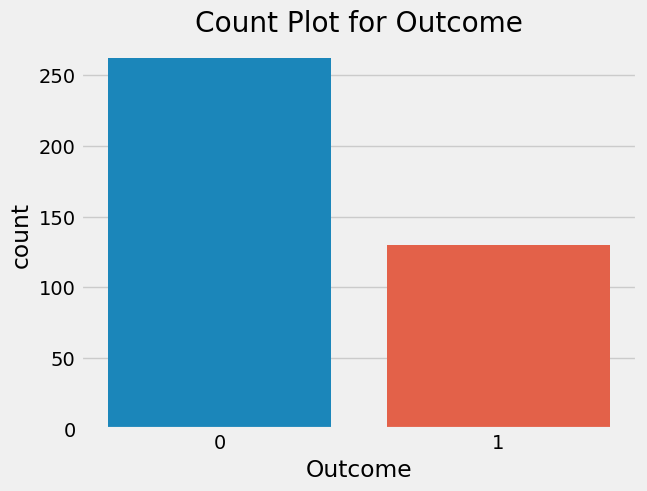

In [17]:
## creating count plot with title using seaborn
sns.countplot(x = dia.Outcome)
plt.title("Count Plot for Outcome")

In [18]:
# Compute the % of diabetic and non-diabetic in the sample
Out0 = len(dia[dia.Outcome == 1])
Out1 = len(dia[dia.Outcome == 0])

Total = Out0 + Out1

PC_of_1 = (Out1*100) / Total
PC_of_0 = (Out0*100) / Total

PC_of_1, PC_of_0

(66.83673469387755, 33.16326530612245)

* There are **66.8%** 1’s (diabetic) and **33.1%** 0’s (nondiabetic) in the data.

## 2.4 Visualize each Variable
> * We will take each variable, one at a time and screen them in the following manner.
> * Study the data distribution (histogram) of each variable – Central tendency, Spread, Distortion(Skewness)
> *To visually screen the association between ‘Outcome’ and each variable by plotting histograms & Boxplots by Outcome value

### 2.4.1 Visualize pregnancies:

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

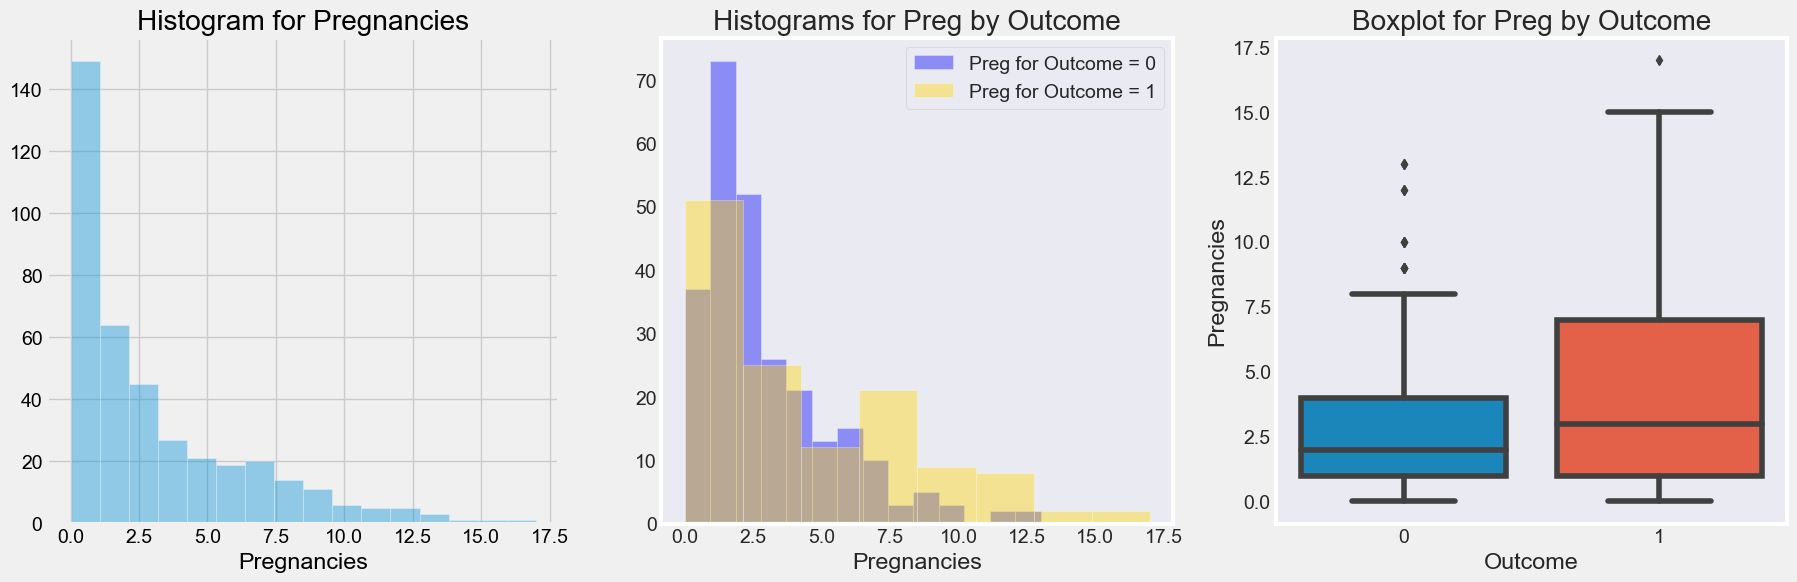

In [19]:
# Creating 3 subplots 
# 1st for histogram 
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies, kde = False)

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.Pregnancies, kde = False, color = "Blue", label = "Preg for Outcome = 0")
sns.distplot(dia1.Pregnancies, kde = False, color = "Gold", label = "Preg for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

> ### From visuals we can say:
> * Data is **right skewed.** For data of count of pregenancies. 
> * A large proportion of the participants are **zero count on pregnancy.** As the data set includes women > 21 yrs, its likely that many are unmarried.
> * When looking at the segemented histograms, **a hypothesis is the as pregnancies includes, women are more likely to be diabetic.**
> * In the boxplots, we find few outliers in both subsets. **Some non-diabetic women have had many pregenancies.**
> * To validate this hypothesis, need to **statistically test.**

### 2.4.2 Visualize Glucose:

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

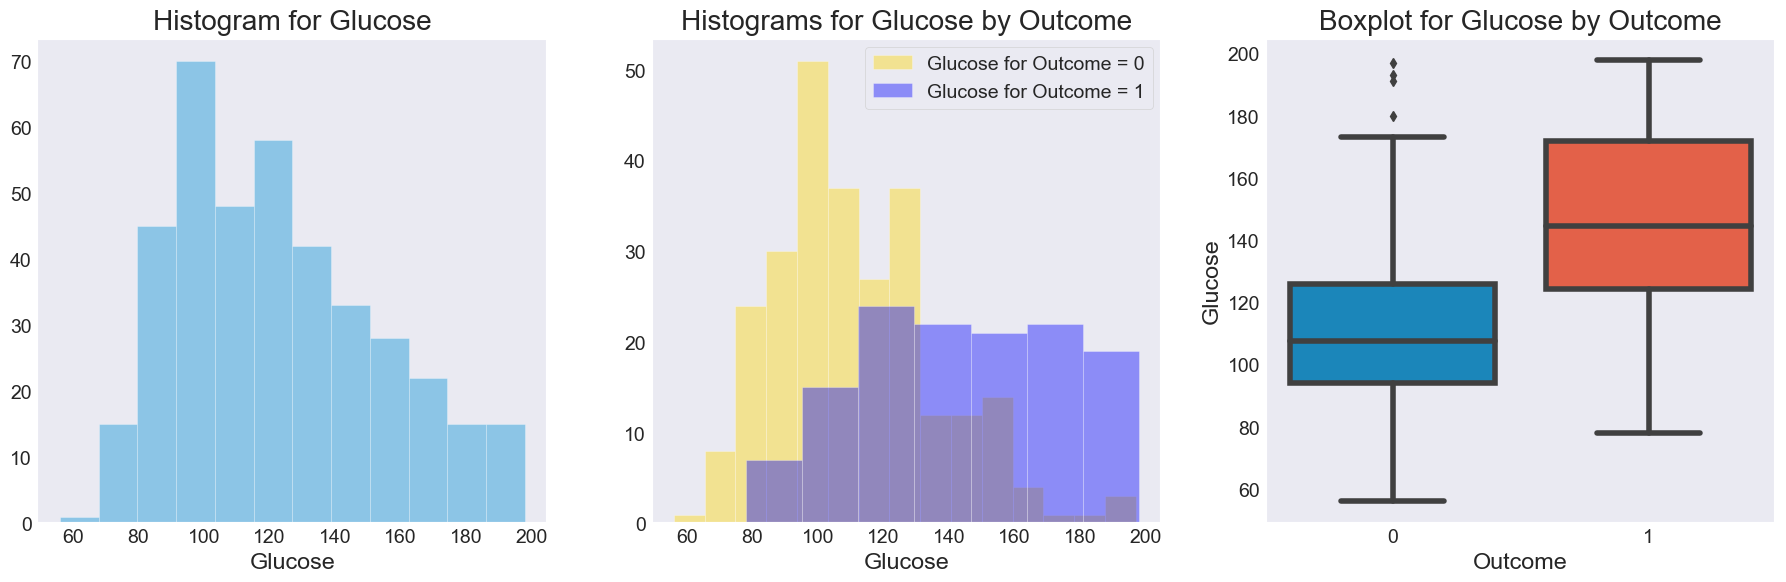

In [20]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde = False)
plt.subplot(1,3,2)

# 2nd for histogram segmented by Outcome
sns.distplot(dia0.Glucose, kde = False, color = "Gold", label = "Glucose for Outcome = 0")
sns.distplot(dia1.Glucose, kde = False, color = "Blue", label = "Glucose for Outcome = 1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.Glucose)
plt.title("Boxplot for Glucose by Outcome")

> ### From visuals we got:
> * **1st graph** –-> Histogram of Glucose data is **slightly skewed to right.** Understandably, the data set contains over 60% who are diabetic and its likely that their Glucose levels were higher.
> * **2nd graph** –-> Clearly diabetic group has **higher glucose** than non-diabetic.
> * **3rd graph** –-> In the boxplot, visually skewness seems acceptable (<2) and its also likely that confidence intervels of the means are not overlapping. So a hypothesis that Glucose is measure of outcome, is likely to be true. But needs to be statistically tested too.

### 2.4.3 Visualize Blood pressure 

Text(0.5, 1.0, 'Boxplot of BP by Outcome')

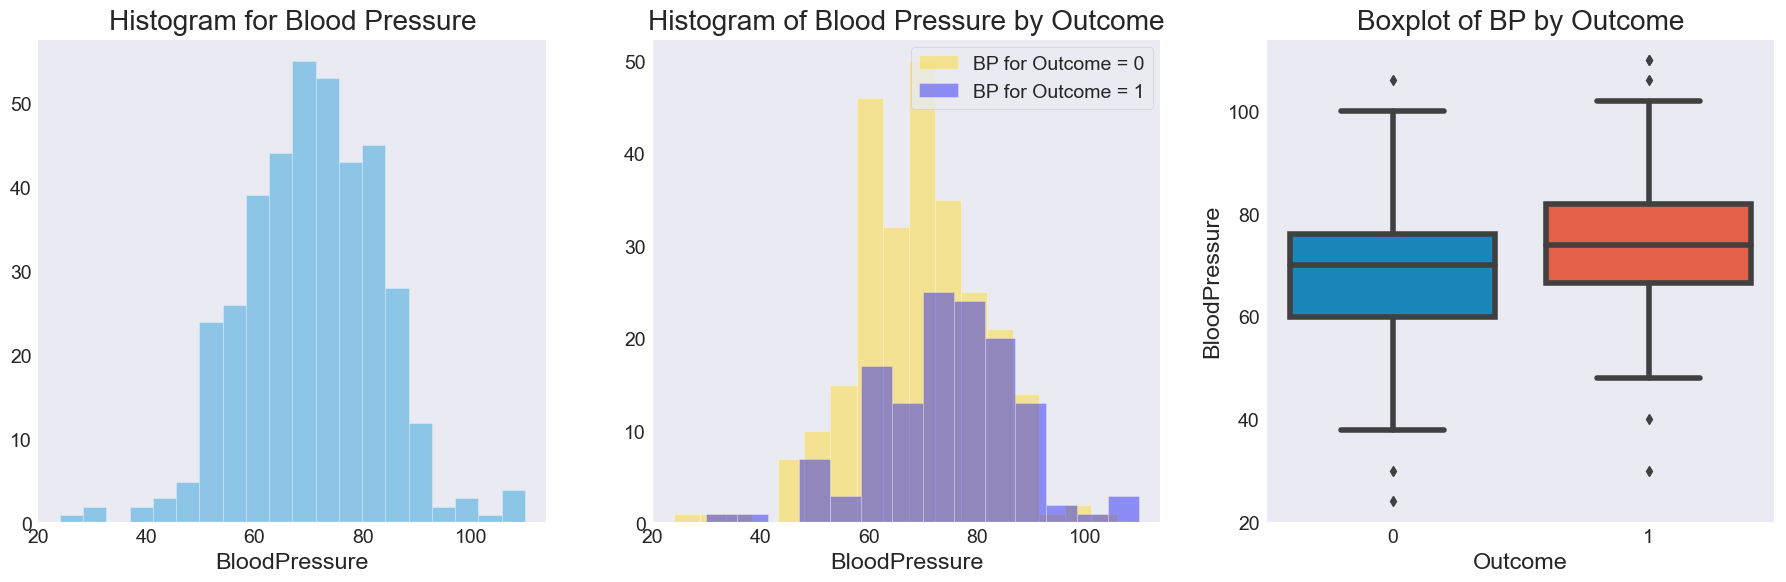

In [21]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.BloodPressure, kde = False)
plt.title("Histogram for Blood Pressure")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.BloodPressure, kde = False, color = "Gold", label = "BP for Outcome = 0")
sns.distplot(dia1.BloodPressure, kde = False, color = "Blue", label = "BP for Outcome = 1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.BloodPressure)
plt.title("Boxplot of BP by Outcome")

> ### From visuals we got:
> * **1st graph** – Distribution looks **normal.** Mean value is 70.
> * **2nd graph** – Most non diabetic women seem to have nominal value of 70 and diabetic women seems to have high BP.
> * **3rd graph** – Few outliers in the data. Its likely that some people have low and some have high BP. So the association between diabetic (Outcome) and BP is an suspect and needs to be statistically validated too.

### 2.4.4 Visualize Skin Thickness

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

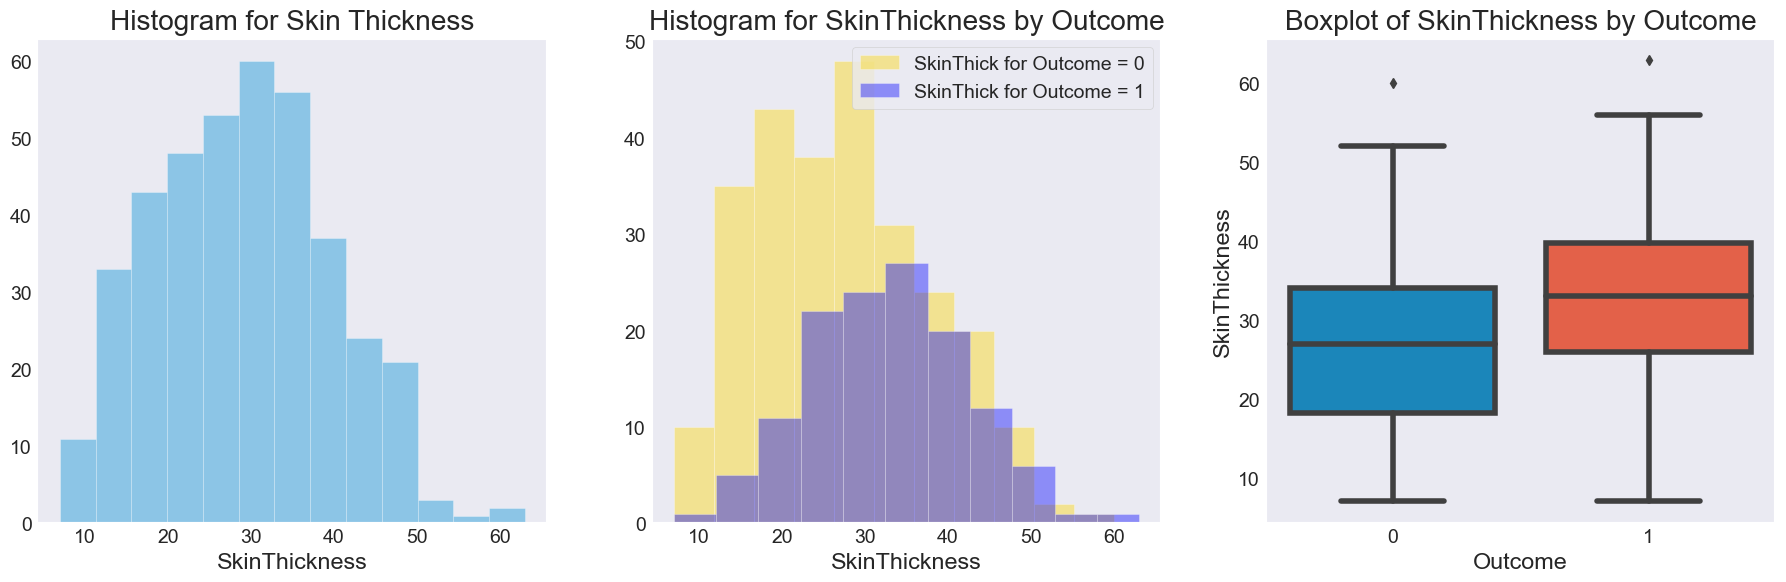

In [22]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.SkinThickness, kde = False)
plt.title("Histogram for Skin Thickness")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.SkinThickness, kde = False, color = "Gold", label = "SkinThick for Outcome = 0")
sns.distplot(dia1.SkinThickness, kde = False, color = "Blue", label = "SkinThick for Outcome = 1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

> ### From visuals we got: 
> * **1st graph** – Skin thickness seems be be skewed a bit.
> * **2nd graph** – Like BP, people who are not diabetic have lower skin thickness. This is a hypothesis that has to be validated. As data of non-diabetic is skewed but diabetic samples seems to be normally distributed.

### 2.4.5 Visualize Insulin

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

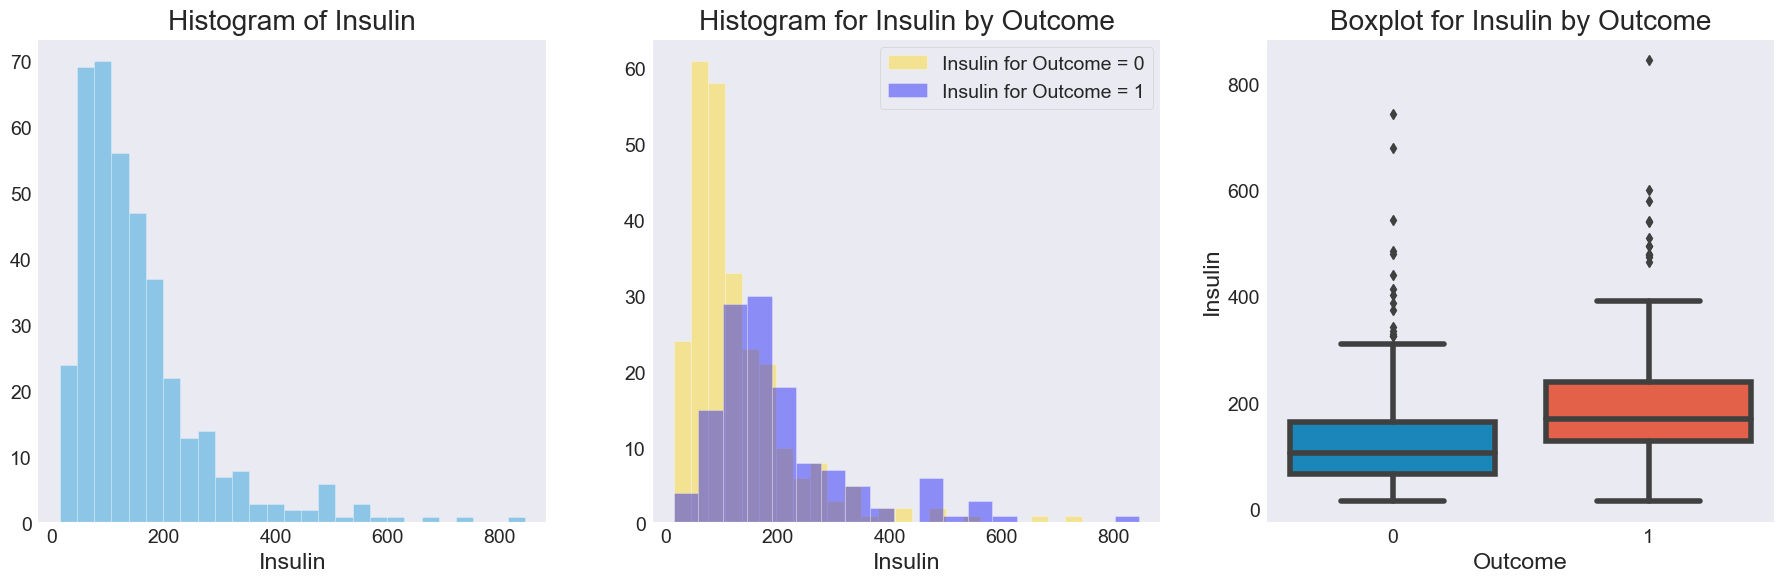

In [23]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.Insulin, kde = False)
plt.title("Histogram of Insulin")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.Insulin, kde = False, color = "Gold", label = "Insulin for Outcome = 0")
sns.distplot(dia1.Insulin, kde = False, color = "Blue", label = "Insulin for Outcome = 1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.Insulin)
plt.title("Boxplot for Insulin by Outcome")

**Clearly there are Outliers in the data. These Outliers are concern for us and most of them with higher insulin values are also diabetic. So this is a suspect.**

### 2.4.6 Visualize BMI

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

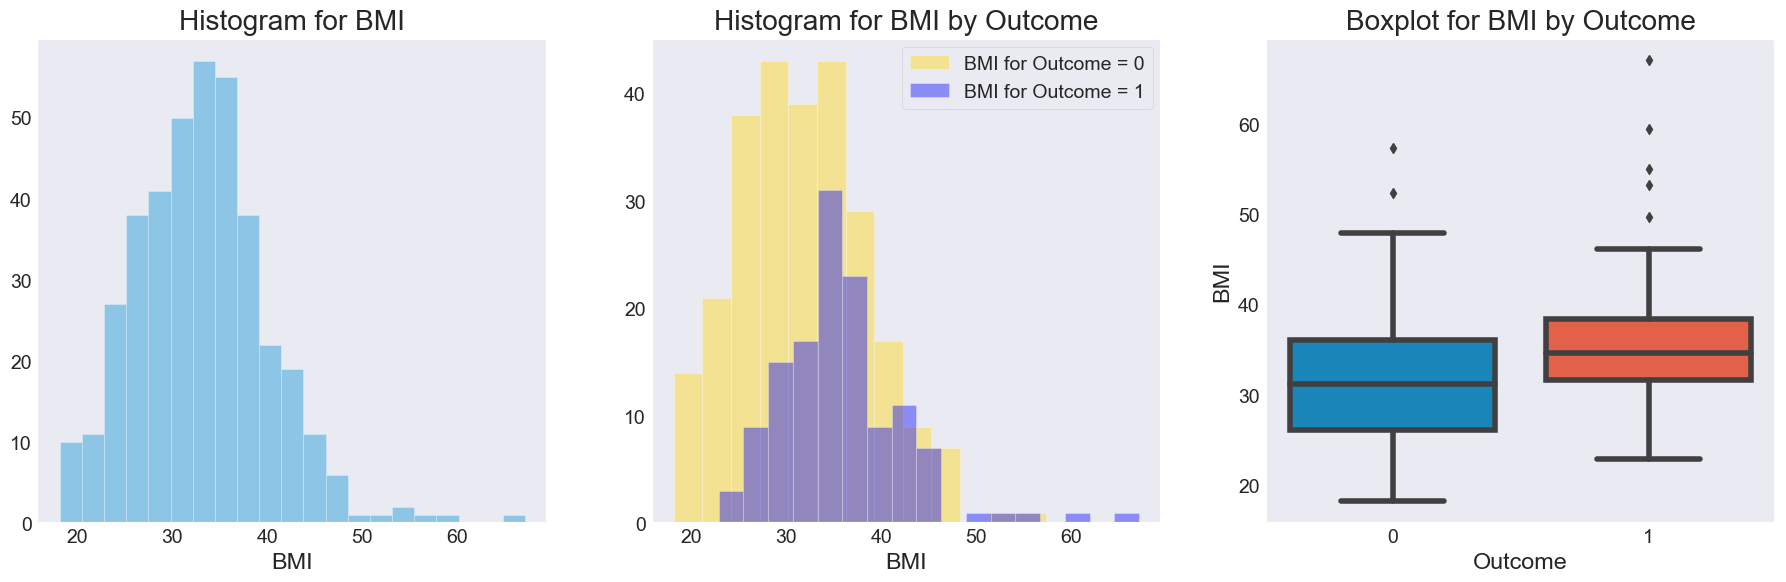

In [24]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.BMI, kde = False)
plt.title("Histogram for BMI")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.BMI, kde = False, color = "Gold", label = "BMI for Outcome = 0")
sns.distplot(dia1.BMI, kde = False, color = "Blue", label = "BMI for Outcome = 1")
plt.legend()
plt.title("Histogram for BMI by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.BMI)
plt.title("Boxplot for BMI by Outcome")

> ### From visuals we got: 
> * **1st graph** – There are few outliers. Few are obese in the dataset. Expected range is between 18 to 25. In general, people are obese
> * **2nd graph** – Diabetic people seems to be only higher side of BMI. Also the contribute more for outliers
> * **3rd graph** – Clearly there are Outliers in the data. These Outliers are concern for us and most of them with higher insulin values are also diabetic. So this is a suspect.

### 2.4.7 Visualize Diabetes Pedigree Function

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

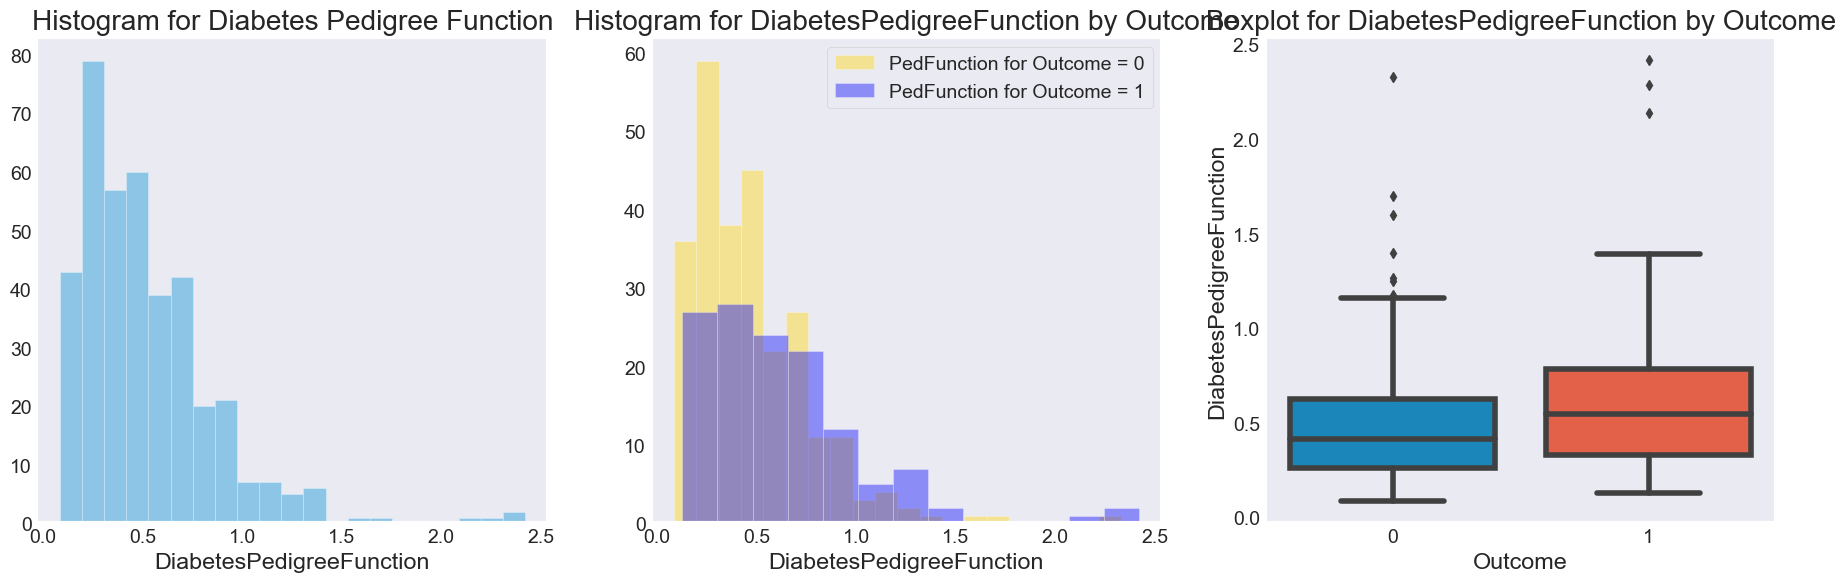

In [25]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")

# 2nd for histogram segmented by Outcome
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome = 0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome = 1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

> ### From Visuals we got: 
> * This variable calculates diabetes likelihood depending on the subject's age her diabetic family history
> * Data is skewed. There seems to be a likelihood of being diabetic, but needs statistical validation

### 2.4.8 Visualize Age

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

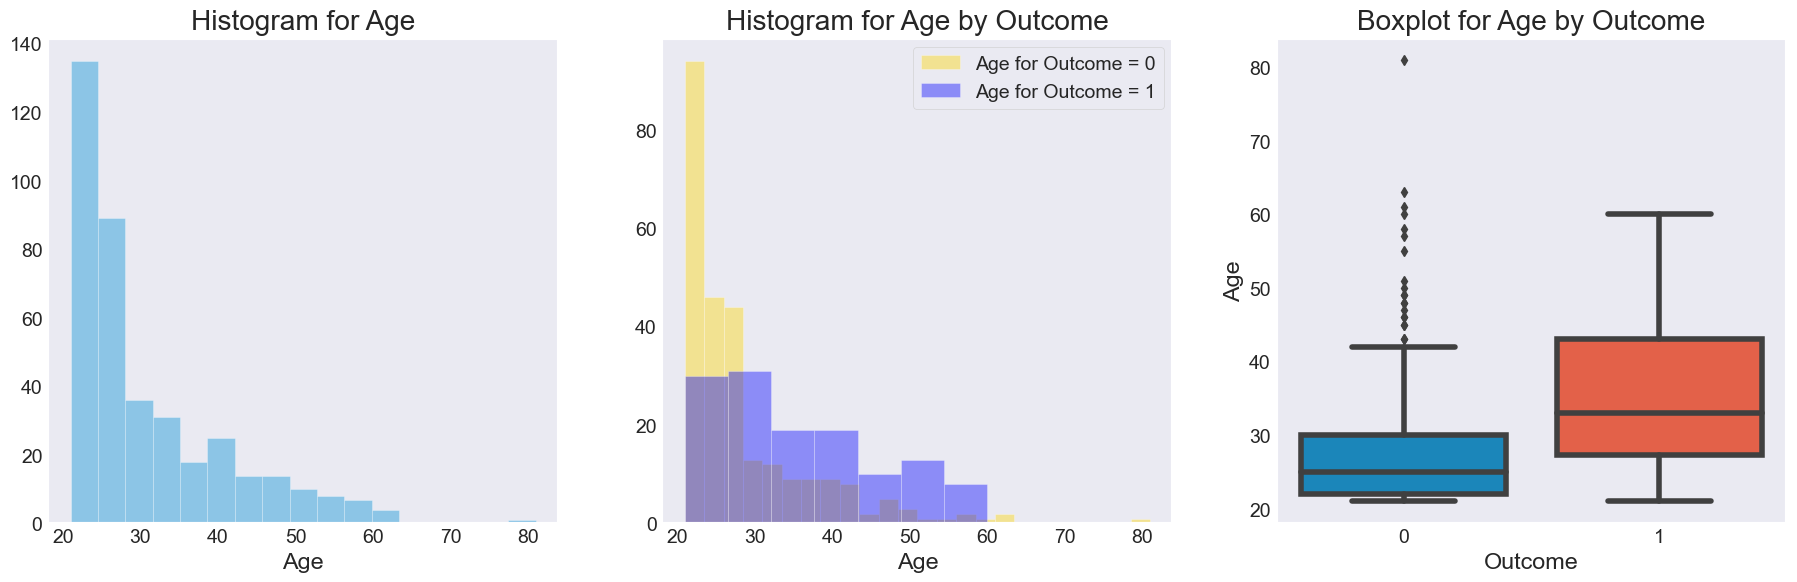

In [26]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")

# 2nd for histogram segmented by Outcome
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False, color="Gold", label="Age for Outcome = 0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome = 1")
plt.legend()
plt.title("Histogram for Age by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age by Outcome")

> ### From visuals we got
> * Age is skewed. This is life data, it is likely to fall into a skewed distribution and not normal.
> * There is a tendency that as people age, they are likely to become diabetic. This needs statistical validation.

_____________________
# 3. Statistical Analysis (Normality test)

**Retrieving p value from normality test function**

In [27]:
## importing stats module from scipy
from scipy import stats

In [28]:
PregnanciesPVAL = stats.normaltest(dia.Pregnancies).pvalue
print("Pregnancies P Value is " + str(PregnanciesPVAL))

Pregnancies P Value is 6.155097831782508e-20


In [29]:
GlucosePVAL = stats.normaltest(dia.Glucose).pvalue
print("Glucose P Value is " + str(GlucosePVAL))

Glucose P Value is 1.3277887088487345e-05


In [30]:
BloodPressurePVAL = stats.normaltest(dia.BloodPressure).pvalue
print("BloodPressure P Value is " + str(BloodPressurePVAL))

BloodPressure P Value is 0.030164917115239397


In [31]:
SkinThicknessPVAL = stats.normaltest(dia.SkinThickness).pvalue
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))

Skin Thickness P Value is 0.01548332935449814


In [32]:
BMIPVAL = stats.normaltest(dia.BMI).pvalue
print("BMI P Value is " + str(BMIPVAL))

BMI P Value is 1.4285556992424915e-09


In [33]:
DiaPeFuPVAL = stats.normaltest(dia.DiabetesPedigreeFunction).pvalue
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))

Diabetes Pedigree Function P Value is 1.1325395699626466e-39


In [34]:
AgePVAL = stats.normaltest(dia.Age).pvalue
print("Age P Value is " + str(AgePVAL))

Age P Value is 1.0358469089881947e-21


* We will use pairplot to study the association between variables – from individual scatter plots
* Then we will compute pearson correlation coefficient
* Then we will summarize the same as heatmap

In [35]:
#!pip install --upgrade seaborn
import seaborn as sns

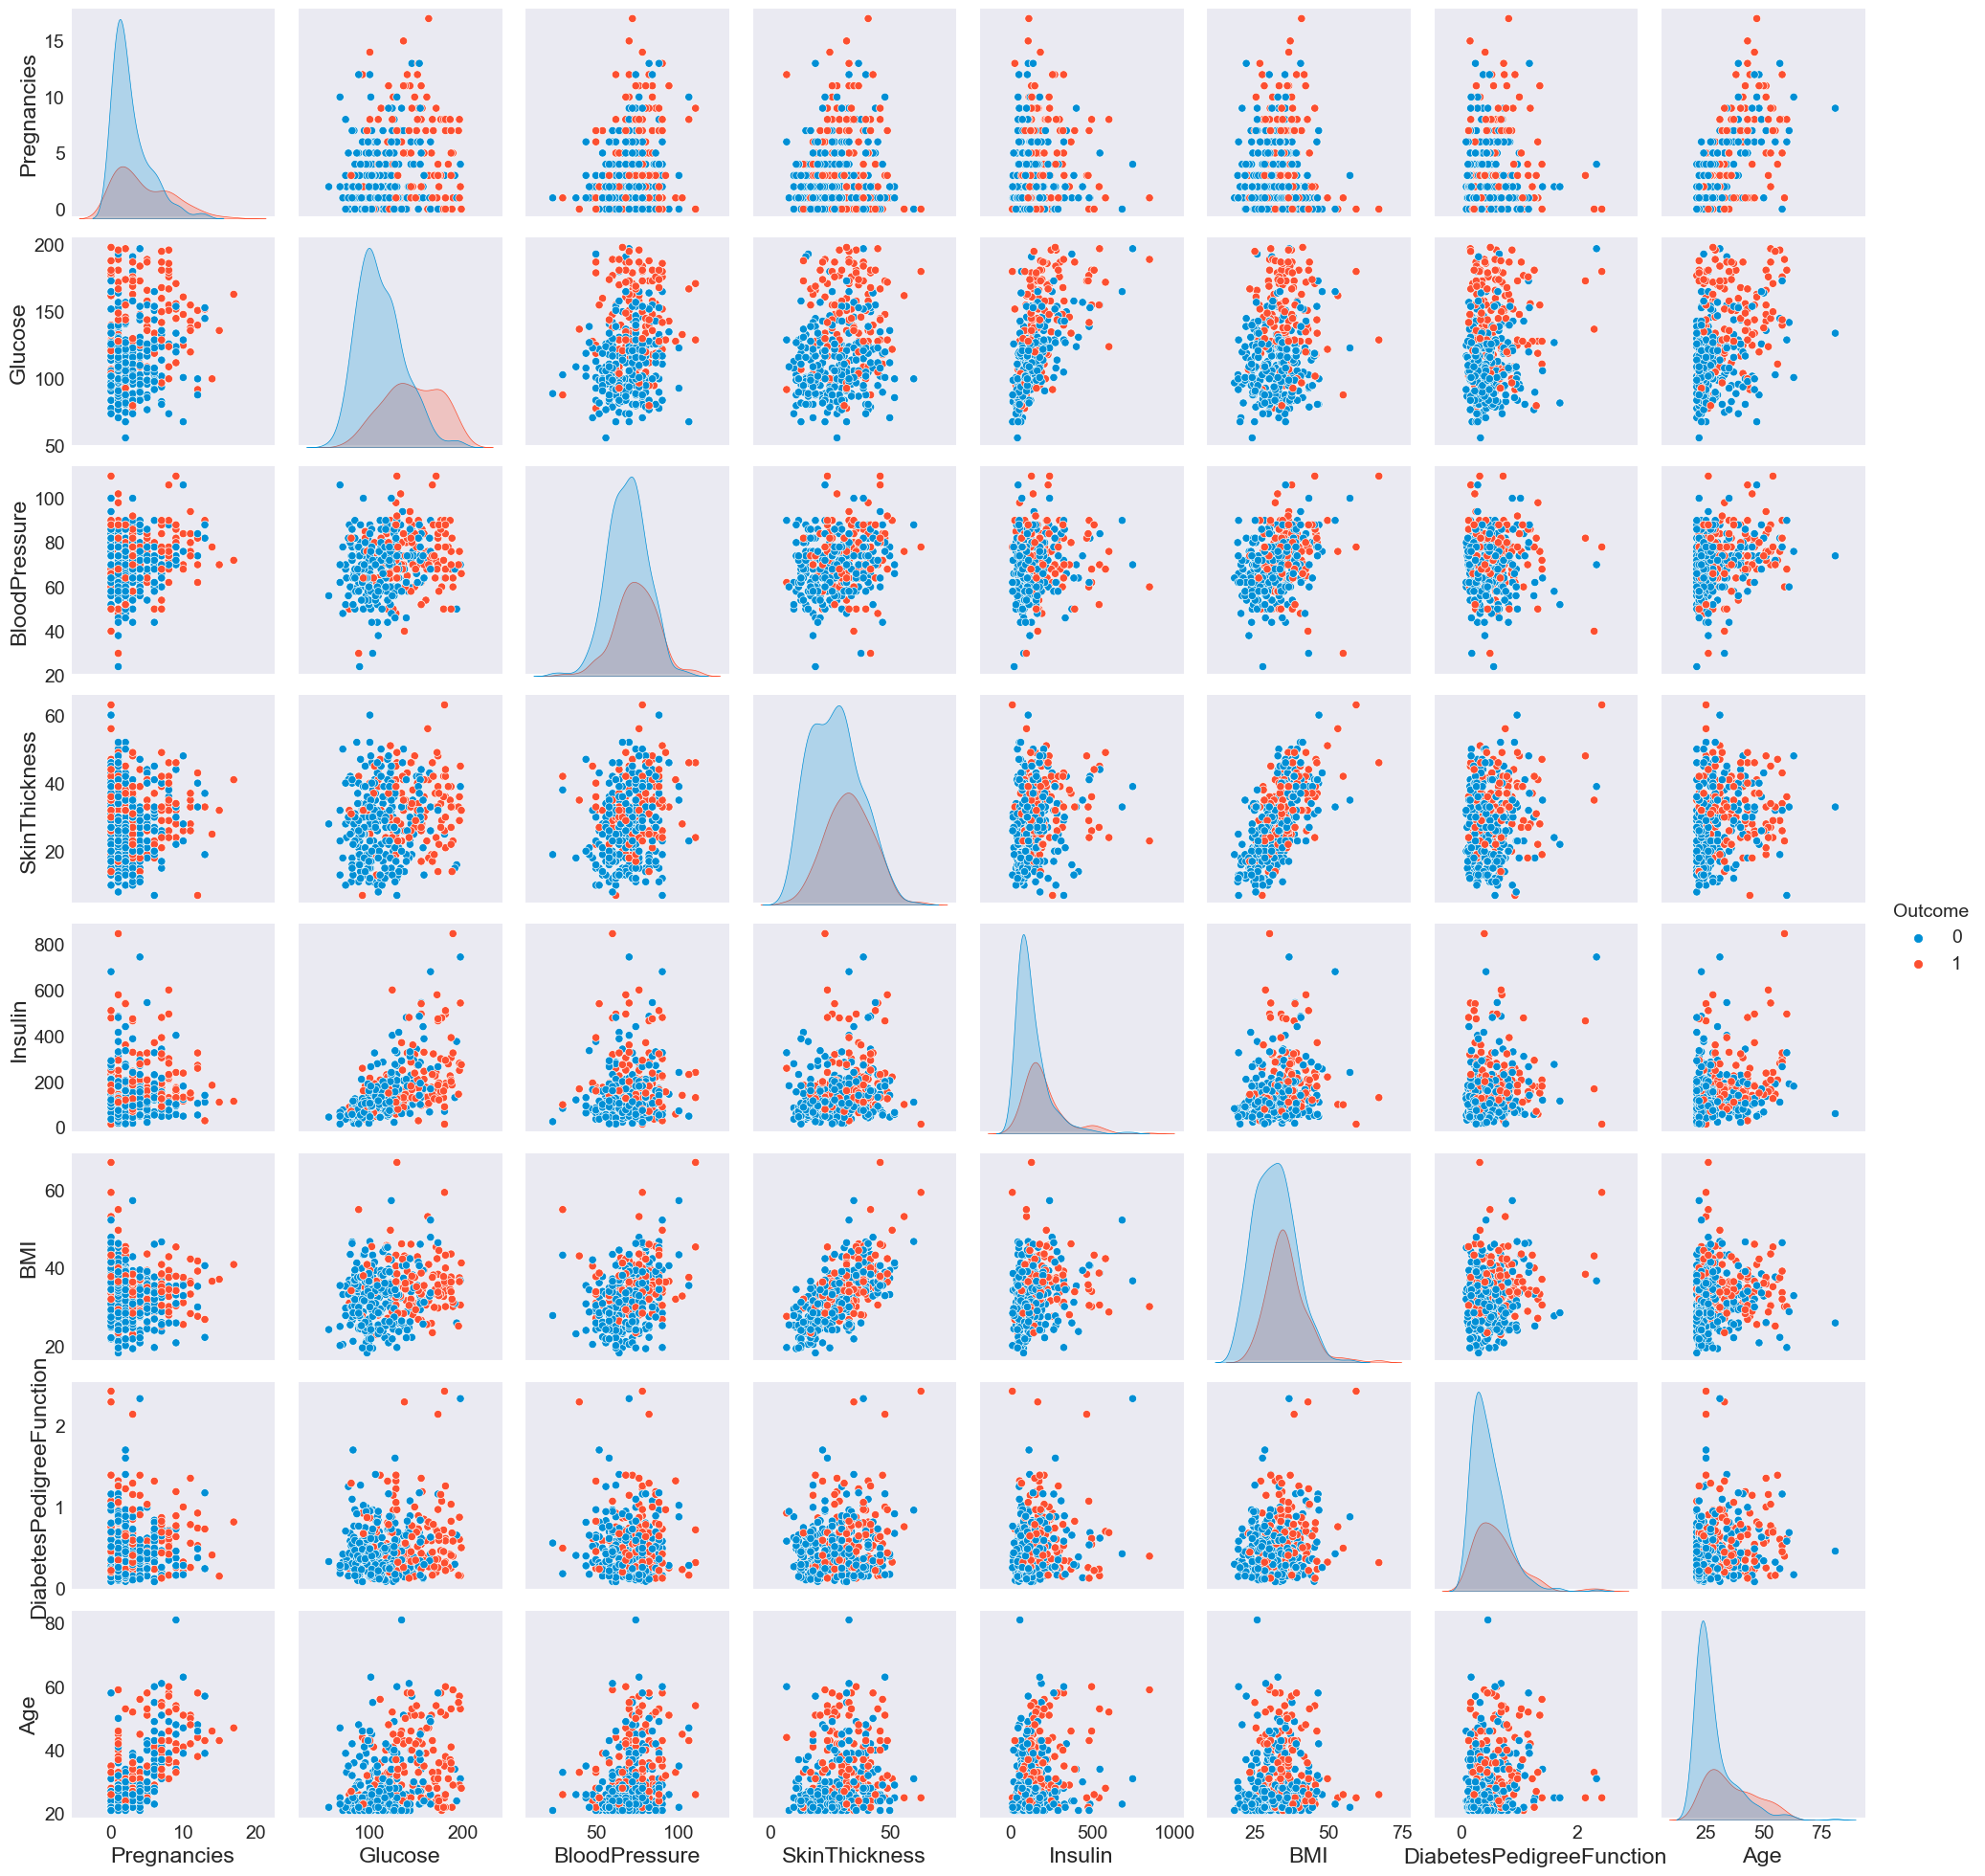

In [36]:
# Pairplot
sns.pairplot(dia, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")

> ### From the pairplot we got:
> * From scatter plots, only BMI, SkinThickness, Pregnancies & Age seem to have positive linear relationships. Another likely suspect is Glucose and Insulin.
> * There are no non-linear relationships
> * We will check it out with Pearson Correlation and plot heat maps

In [37]:
cor = dia.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<Axes: >

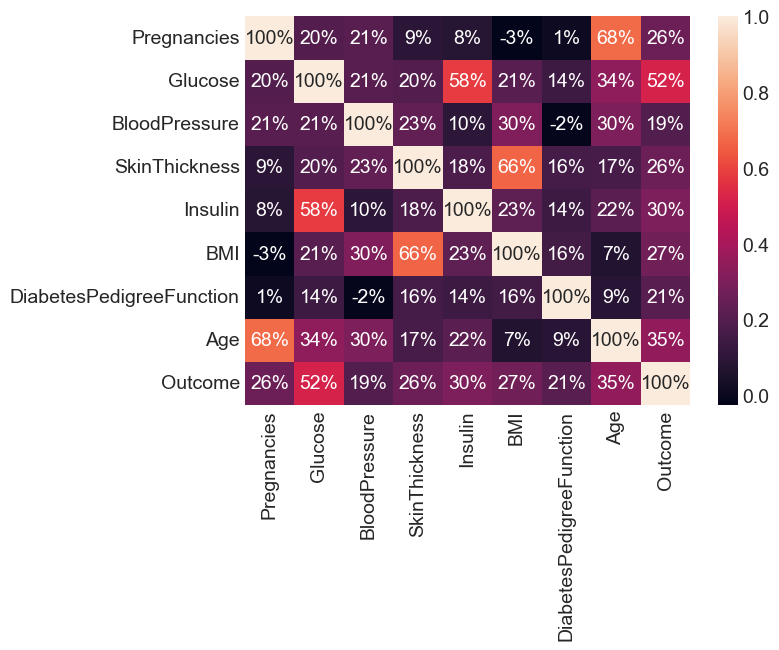

In [38]:
sns.heatmap(cor, annot=True, fmt= "0.0%")

> * **Age & Pregnancies and BMI & SkinThickness have moderate positive linear relationship**
> * **Glucose & Insulin technically has low correlation but 0.58 is close to 0.6 so can be assumed as moderate correlation**

### From our work till now we can say:
* Data set contains many zero values and they have been removed and remaining data has been used for visualizing and model building.
* Nearly 66% of participants are diabetic in the sample data.
* Visuals like (boxplots and segmented histograms) shows that few factors seem to influence the outcome.
* Moderate correlation exists between few factors and so while building model, this has to be borne in mind. If co-correlated factors are included, it might lead to Inflation of Variance.

______________________
# 4. Exploratory Data Analysis (EDA)
## **The Nutritional status** 
![BMI](https://images.everydayhealth.com/images/diet-nutrition/weight/bmi-in-adults-722x406.jpg)

**Here we will work on our original data (diabetes_data)**

In [39]:
# Create Nutritional status column 
Nutritional_status = pd.Series([]) 

In [40]:
# Nutritional status based on BMI

for i in range(len(diabetes_data)): 
    if diabetes_data['BMI'][i] == 0.0: 
        Nutritional_status[i]= "NA"
    
    elif diabetes_data['BMI'][i] < 18.5: 
        Nutritional_status[i]= "Underweight"
        
    elif diabetes_data['BMI'][i] < 25: 
        Nutritional_status[i]= "Normal"
  
    elif diabetes_data['BMI'][i] >= 25 and diabetes_data['BMI'][i] < 30: 
        Nutritional_status[i]= "Overweight"
  
    elif diabetes_data['BMI'][i] >= 30: 
        Nutritional_status[i]= "Obese"
        
    else: 
        Nutritional_status[i]= diabetes_data['BMI'][i] 

In [41]:
# Insert new column - Nutritional Status
diabetes_data.insert(6, "Nutritional Status", Nutritional_status)

In [42]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [43]:
diabetes_data['Nutritional Status'].value_counts()

Nutritional Status
Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: count, dtype: int64

> **11 women don't have information about BMI. Only 106 of 758 women have normal weight. Most of the women present overweight or obesity.**

_______________________________
### The Interpretation of Glucose level
![OGTT](https://ro.co/health-guide/wp-content/uploads/sites/5/2021/12/How-to-read-your-glucose-test-2.png)

In [44]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 
OGTT_Interpretation = pd.Series([]) 

In [45]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)
for i in range(len(diabetes_data)): 
    if diabetes_data['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif diabetes_data['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif diabetes_data['Glucose'][i] > 140 & diabetes_data['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif diabetes_data['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= diabetes_data['Glucose'][i] 

In [46]:
# Insert new column - Glucose Result
diabetes_data.insert(2, "Glucose Result", OGTT_Interpretation)

In [47]:
diabetes_data['Glucose Result'].value_counts()

Glucose Result
Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: count, dtype: int64

**We need to calculate HOMA-IR(Homeostatic Model Assessment for Insulin Resistance) to get information about insulin resistance**

In [48]:
Impaired_Glucose_Tolerance_Diabetic = ((diabetes_data['Glucose'] > 140 ) & (diabetes_data['Glucose'] <= 198) & 
                                       (diabetes_data['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

**Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.**

In [49]:
Normal_Glucose_Diabetic = ((diabetes_data['Glucose'] != 0 ) & (diabetes_data['Glucose'] <= 140) & (diabetes_data['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

**Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed.**

In [50]:
diabetes_data.max()

Pregnancies                          17
Glucose                             199
Glucose Result                   Normal
BloodPressure                       122
SkinThickness                        99
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

In [51]:
diabetes_data.min()

Pregnancies                                          0
Glucose                                              0
Glucose Result              Impaired Glucose Tolerance
BloodPressure                                        0
SkinThickness                                        0
Insulin                                              0
BMI                                                0.0
Nutritional Status                                  NA
DiabetesPedigreeFunction                         0.078
Age                                                 21
Outcome                                              0
dtype: object

> * It can be seem that only adult women were included as the minimum age is 21 years old. It can be noticed that a number of women don't have information of some of the attributes, such as glucose, blood pressure, etc as the minimum value is zero.
> * The nutritional status 'underweight' should not be classified as Max Value in medical point of view. However, it was considered as a Max value as it starts with the letter U.

In [52]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5
diabetes_data_underweight = diabetes_data[diabetes_data['Nutritional Status'] =='Underweight']
diabetes_data_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,19,82,18.2,Underweight,0.299,21,0


In [53]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**500 not diabetic and 268 are diabetic**

In [54]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(diabetes_data[diabetes_data['Outcome']==0])
count_not_diabetic

500

In [55]:
df = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [56]:
# Check the average of features grouped by Outcome (Diabetes)

df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [57]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [58]:
# Shows women that contains information about Glucose
diabetes_data_glucose = df.loc[df['Glucose'] != 0]

In [59]:
diabetes_data_glucose.shape

(763, 9)

**Most women of the sample have data regarding glucose (only 5 of them don't have any glucose value) as it is an important information to check the health status of a diabetic person.**

Check average of glucose from women that don't have zero value of glucose

In [60]:
diabetes_data_glucose['Glucose'].mean()

121.6867627785059

The average of glucose is at the normal range **(less than 140 mg/dl).**

In [61]:
diabetes_data_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


**Check minimum and maximum values of glucose from women that don't have zero value of glucose**

In [62]:
diabetes_data_glucose['Glucose'].min()

44

In [63]:
diabetes_data_glucose['Glucose'].max()

199

> The minimum value of BMI shows that there is no case of underweight, but the maximum value shows cases of women with morbid obesity (BMI >= 40kg/m2).

In [64]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure
df_all = df.loc[(df['BMI'] != 0) & (df['Insulin'] != 0) & 
                           (df['BloodPressure'] != 0) & (df['Glucose'] != 0)]

In [65]:
df_all.shape

(392, 9)

Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [66]:
df_all['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

262 women don't have Diabetes and 130 have Diabetes.

In [67]:
df_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [68]:
df_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


* Diabetic women tend to have higher number of pregnancies, higher level of glucose, higher Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age. 
* Both groups present BMI that indicates obesity. 
* Women that have Diabetes have an average of insulin that is higher than the normal range (16 - 166 mIU/L). 
* Both groups have average of glucose higher than the normal range (<= 100 mg/dL). 
* It might indicate that some non diabetic women are in risk of have Diabetes in the future, specially the ones with higher levels of insulin (that might have insulin resistance).

### Attributes Distribution

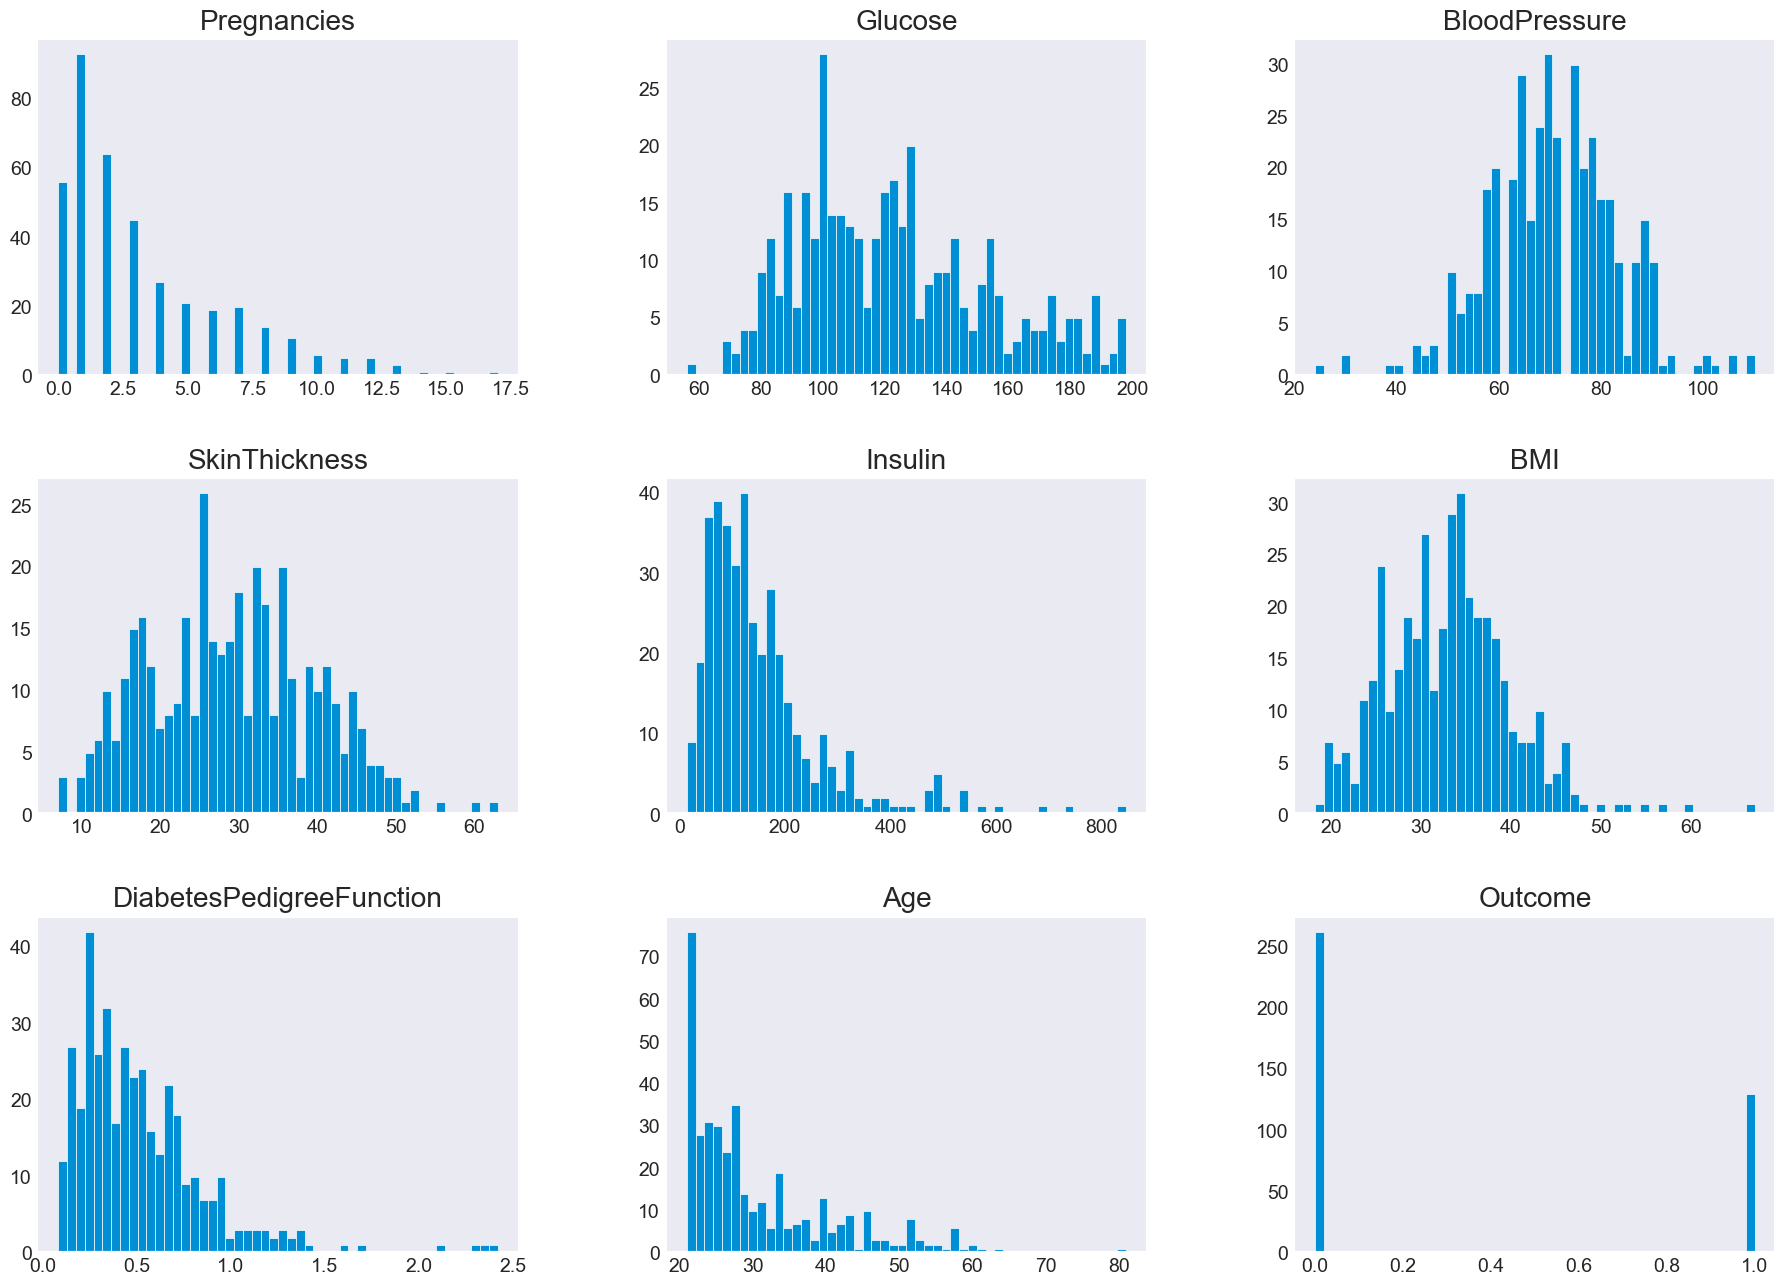

In [69]:
# Histogram
df_all.hist(bins=50, figsize=(20, 15), grid = False)
plt.show()

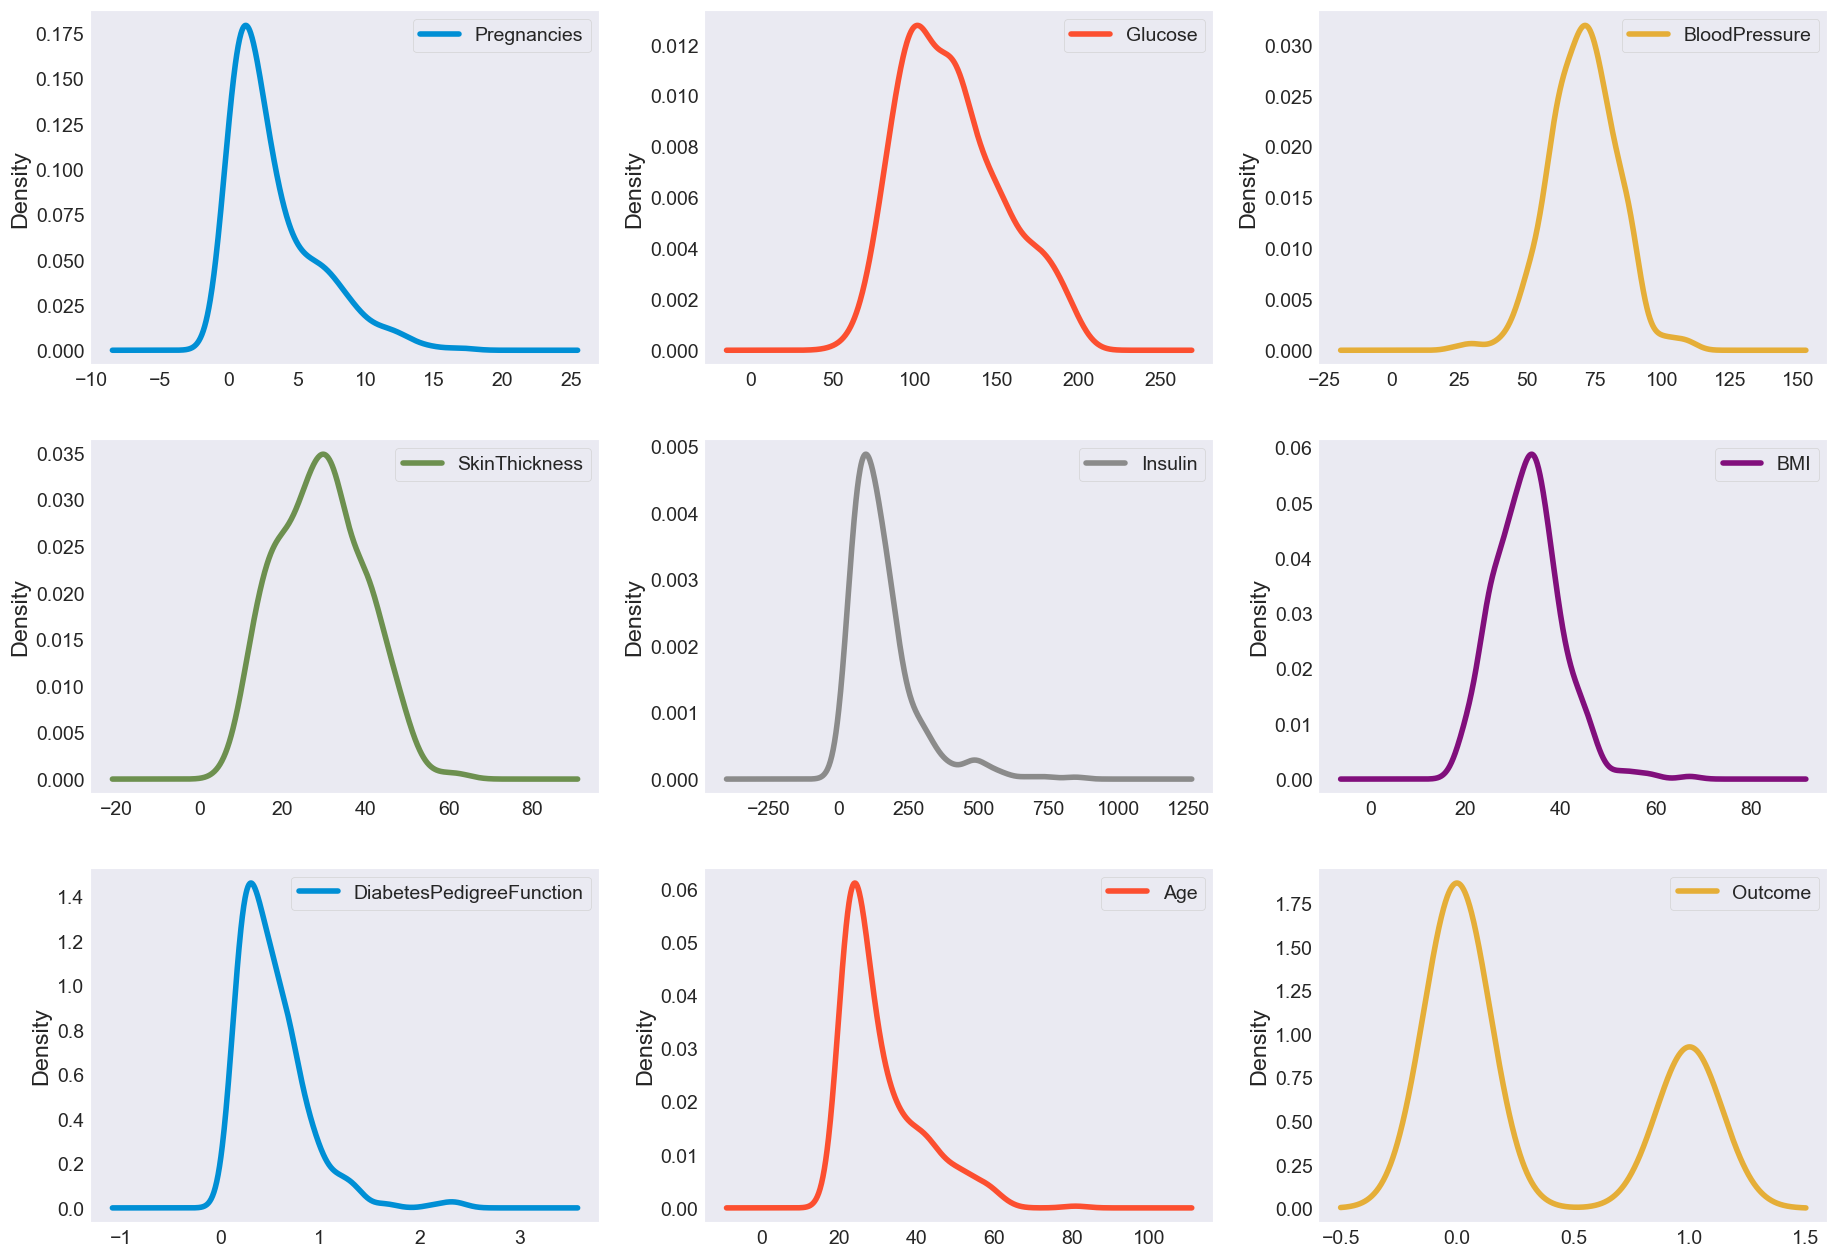

In [70]:
# Density plots for all attributes to visualize the distribution of each attribute
df_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                     Axes(0.08,0.641765;0.255882x0.238235)
Glucose                     Axes(0.387059,0.641765;0.255882x0.238235)
BloodPressure               Axes(0.694118,0.641765;0.255882x0.238235)
SkinThickness                   Axes(0.08,0.355882;0.255882x0.238235)
Insulin                     Axes(0.387059,0.355882;0.255882x0.238235)
BMI                         Axes(0.694118,0.355882;0.255882x0.238235)
DiabetesPedigreeFunction            Axes(0.08,0.07;0.255882x0.238235)
Age                             Axes(0.387059,0.07;0.255882x0.238235)
Outcome                         Axes(0.694118,0.07;0.255882x0.238235)
dtype: object

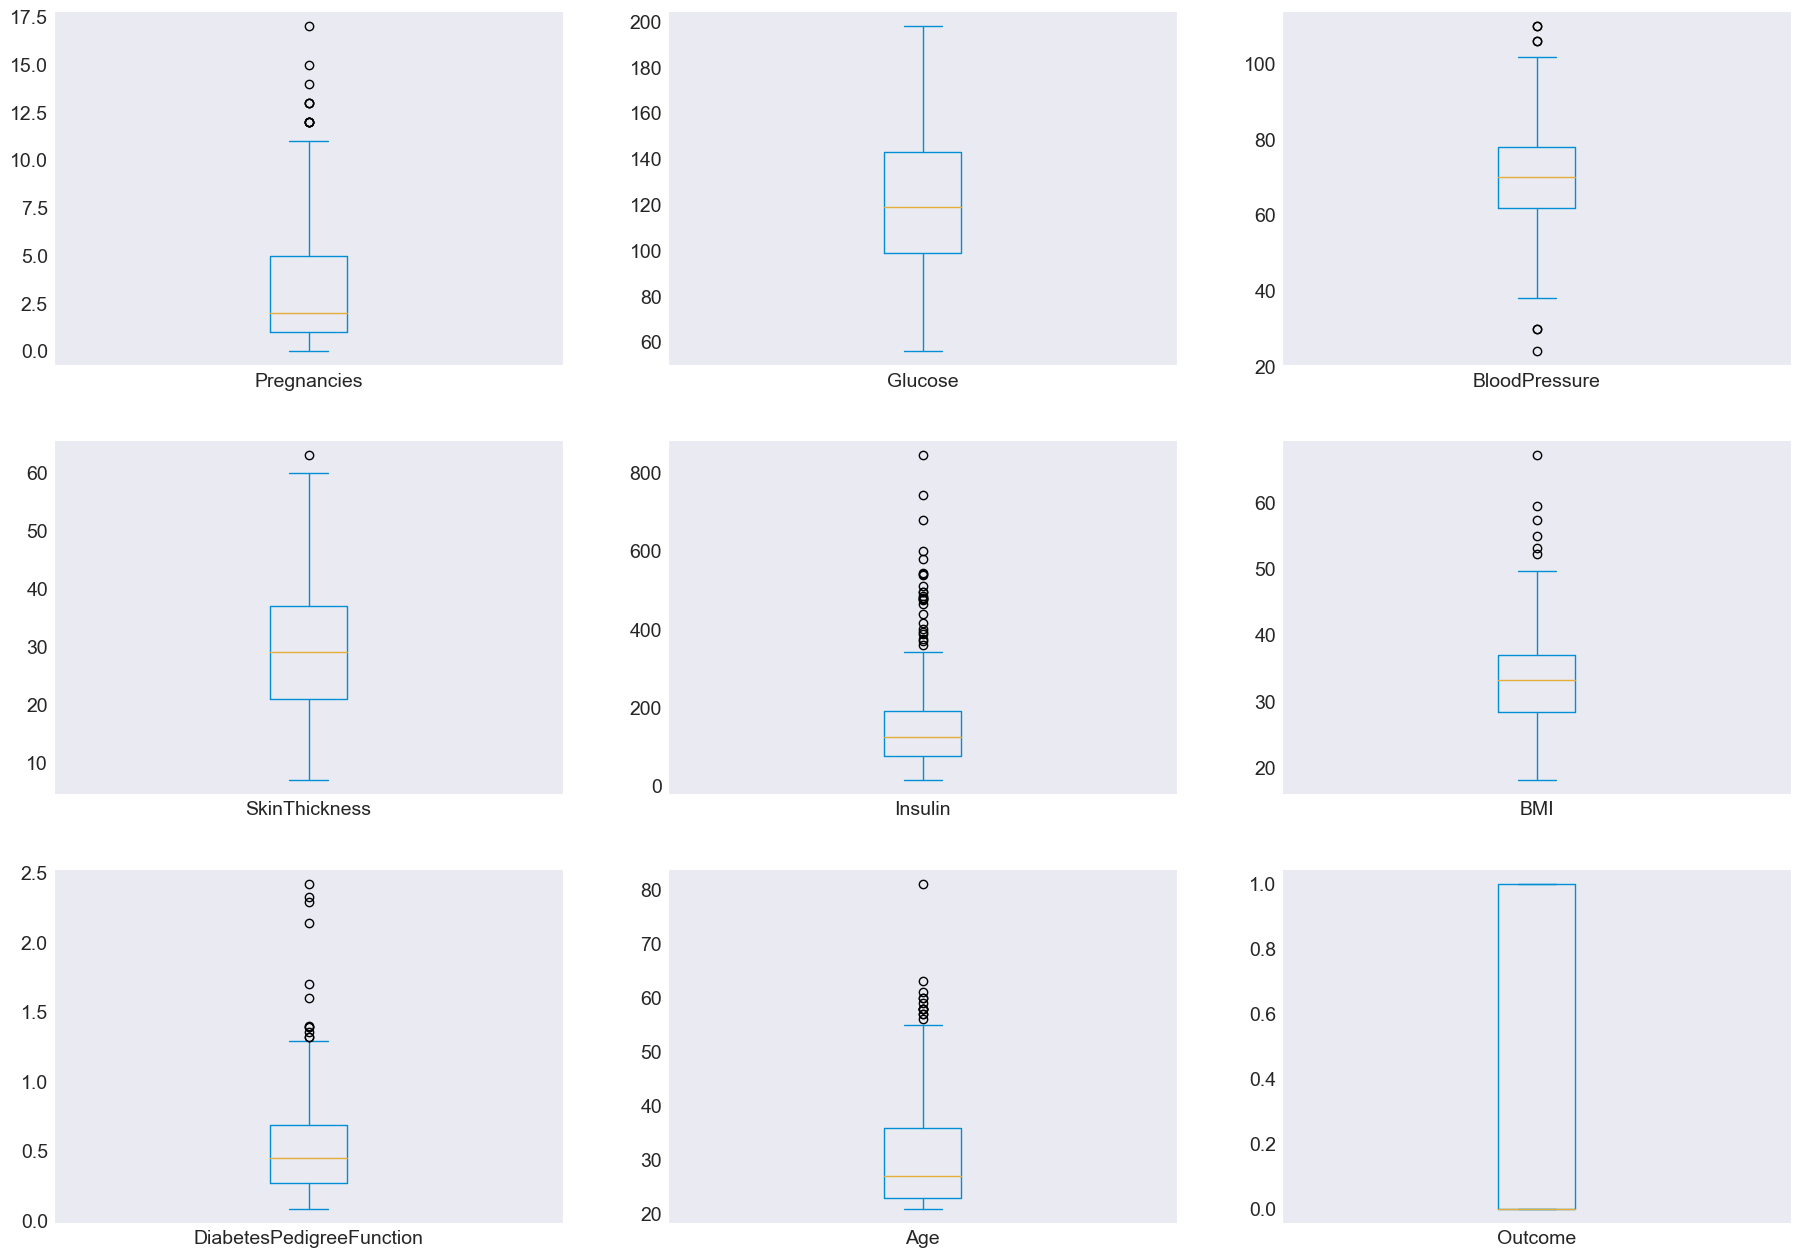

In [71]:
#Box and Whisker plot to find the outliers
df_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [72]:
#Skew of attributes distributions
skew = df_all.skew(axis = 1)

> **Bell shape curve: Blood Pressure**
>- **Right-Skewed: Age, Insulin, Pregnancies, Diabetes Pedigree Function**
>- **Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI**

>- **At least 75% of the women:**
> * are 25 years old or older
> * have BMI nearly 30 kg/m2
> * have insulin level 100 or more
> * have 1 or more pregnancies
> * have glucose level of 100 mg/dL or more
> * have blood pressure of 60 mmHg or more

### **Co-relation of Variables**

In [73]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


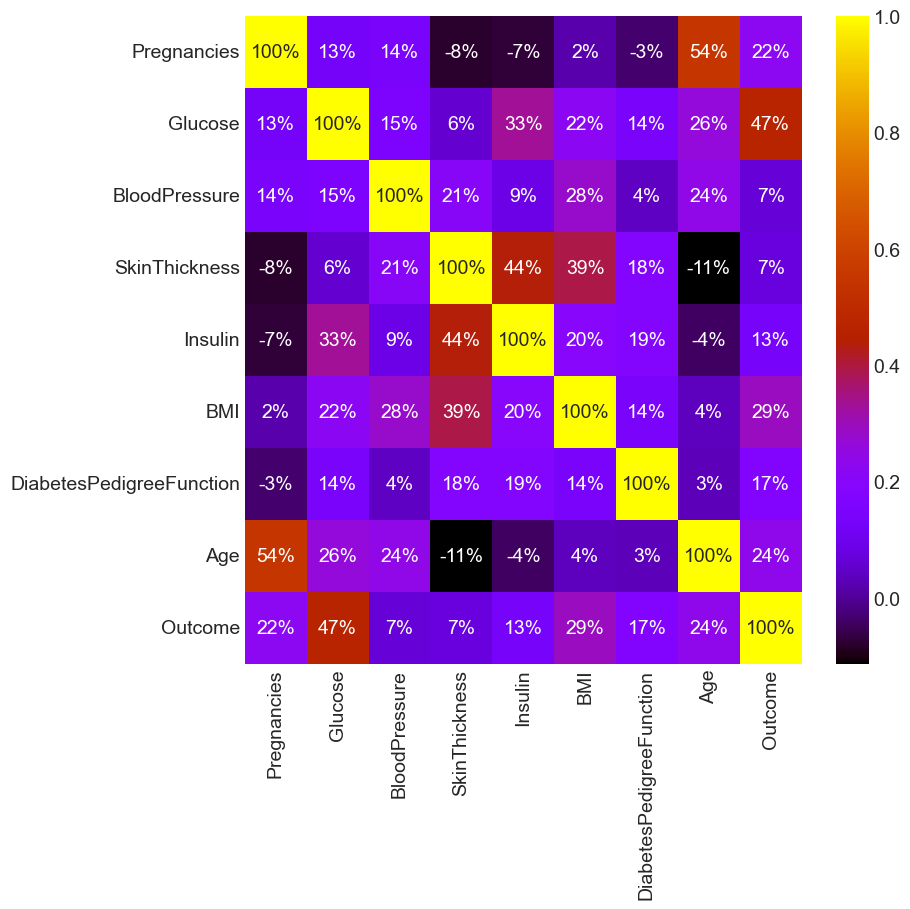

In [74]:
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap ='gnuplot', fmt= ".0%")
plt.show()

### There are no strong correlation between the features
**The 'strongest' ones are the following (as expected):**
> * Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
> * Glucose x insulin (0.58)
> * Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM
> * Skin fold thickness x BMI (0.66) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

**Negative correlation:** 
> * BMI x Pregnancies (-0.025)
> * Blood Pressure x Diabetes Pedigree Function (-0.016)

* **Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.**
* **The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.**

___________________
## 3. Extracting Independent and Dependent Variable

In [75]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


> **The Outcome 0 means No diabetes --> Healthy Person, outcome 1 means diabetes - Diabetic Person** <br>
> **The Outcome 1 means diabetes --> Diabetic Person** <br>
> * So we found out of these 768 data points, 500 are labeled as 0 and 268 as 1

## 5. Buliding Machine Learning Model</a> 
   > * **5.1. KNN Algorithm**<br> 
   > * **5.2. Logistic Regression**<br> 
   > * **5.3. DecisionTreeClassifier**<br>
   > * **5.4. Random Forest**<br> 
   > * **5.5. GradientBoosting** <br> 
   > * **5.6. Support Vector Machine SVM**<br> 
   > * **5.7. Neural Networks**<br> 
  

### 5.1 : K-Nearest Neighbors (KNN)
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [76]:
cols = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X = df[cols]
y = df.Outcome

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], 
                                                    df['Outcome'], stratify = df['Outcome'], random_state=66)


In [78]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

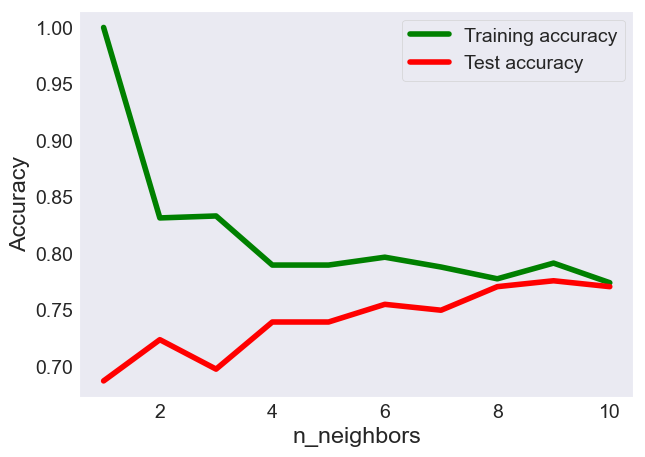

In [79]:
# Draw Plot for Training data Accuracy and test Data Accuracy
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy",color = "green")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy",color = "r")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

* If we choose one single nearest neighbor, the prediction on the training set is perfect. 
* But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.
* The best performance is somewhere around 9 neighbors.
> The above plot suggests that we should choose n_neighbors = 9


In [80]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


### 5.2: Logistic Regression Model
Logistic regression is one of the most common classification algorithms.

In [81]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.778
Test set accuracy: 0.771


**The default value of C = 1 provides with 78% accuracy on training and 77% accuracy on test set.**

> The C parameter controls the trade-off between achieving a low training error and a low testing error. A smaller value of C creates a wider margin hyperplane that may lead to more training errors but better generalization to the test set, while a larger value of C creates a narrower margin hyperplane that may result in fewer training errors but worse performance on the test set.

In [82]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


**Using C = 0.01 results in lower accuracy on both the training and the test sets.**

In [83]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test))) 

Training set accuracy: 0.783
Test set accuracy: 0.781


**Using C = 100 results in a little bit higher accuracy on training set little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.**
> **Therefore, we should choose default value C = 1**

Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C.

**Stronger regularization (C = 0.01) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C = 100, C = 1 and C = 0.01, the coefficient is positive. This indicates that high “DiabetesPedigreeFunction” feature is related to a sample being “diabetes”, regardless which model we look at.**


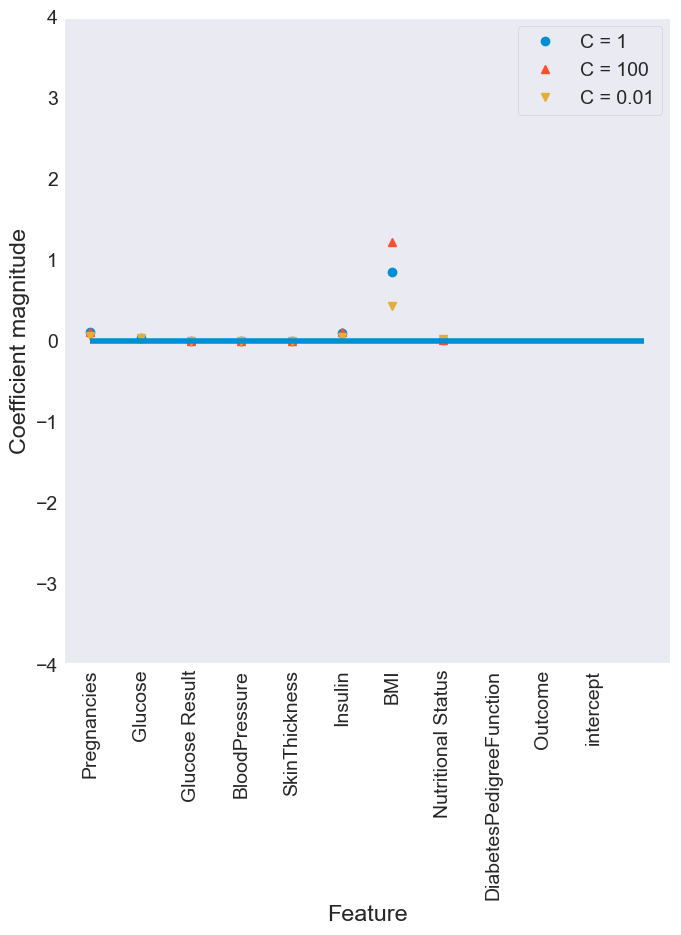

In [84]:
# Draw a Plot to find more diabetic features in a person
diabetes_data_features = [x for i,x in enumerate(diabetes_data.columns) if i!=9]

plt.figure(figsize=(7,8))
plt.plot(logreg.coef_.T, 'o', label="C = 1")
plt.plot(logreg100.coef_.T, '^', label="C = 100")
plt.plot(logreg001.coef_.T, 'v', label="C = 0.01")
plt.xticks(range(diabetes_data.shape[1]), diabetes_data_features + ['intercept'], rotation=90)
plt.hlines(0, 0, diabetes_data.shape[1])
plt.ylim(-4, 4)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

### 5.3: Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


**The accuracy on the training set is 100%, while the test set accuracy is much worse.**
> This is an indicative that the tree is overfitting and not generalizing well to new data. 
Therefore, we need to apply pre-pruning to the tree

**We set max_depth = 3, limiting the depth of the tree decreases overfitting.** 
> This leads to a lower accuracy on the training set, but an improvement on the test set.

In [87]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


### 5.3.1 Feature importance in Decision trees
**Feature importance rates how important each feature is for the decision a tree makes.** <br>
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [88]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


**Now Lets visualize the feature importances in the Decision Tree Model**

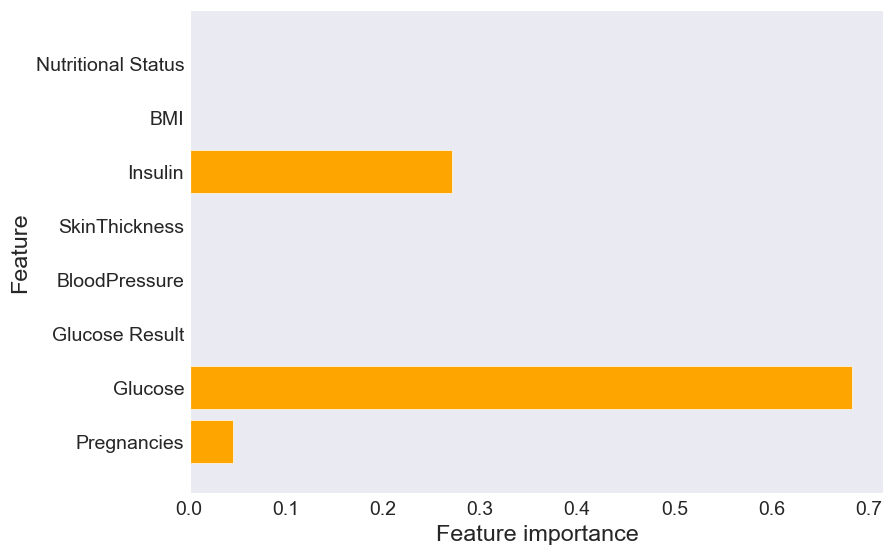

In [89]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center', color="orange")
    plt.yticks(np.arange(n_features), diabetes_data_features[:n_features])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

**From above graph, we can say that the Feature "Glucose" is by far the most important feature.and then BMI is at second place**

### 5.4: Random Forest Model: 

**We will apply a random forest consisting of 100 trees on the diabetes dataset:**

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


**The random forest model gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters.** <br>
> we can adjust the max_features setting, to see whether the above result can be improved or not.

In [91]:
rf1 = RandomForestClassifier(max_depth = 3, n_estimators = 100, random_state = 0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


It did not, this indicates that **the default parameters of the random forest work well**.

### 5.5.1 Feature importance in Random Forest

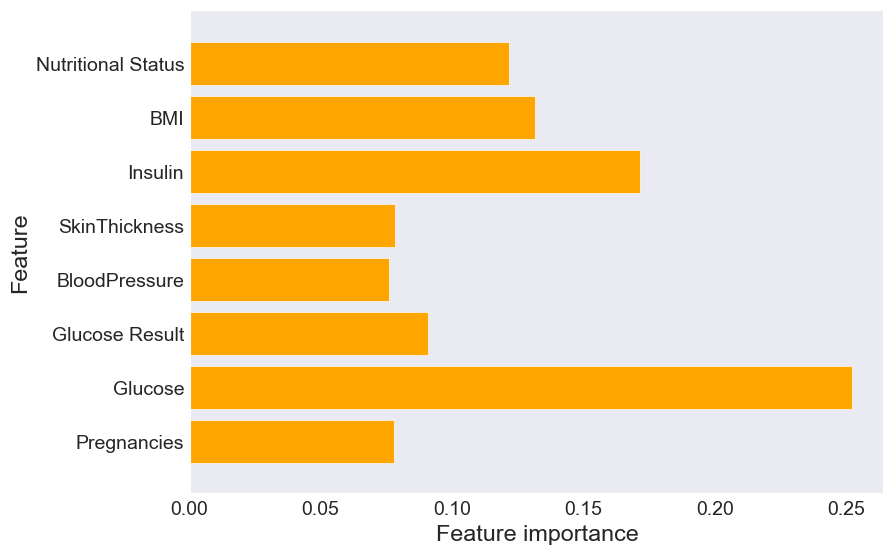

In [92]:
plot_feature_importances_diabetes(rf)
plt.savefig('feature_importance')

**Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall.**<br>

> ***The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.***

### 5.5 : Gradient Boosting Model

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


**This is an indicative that the Gradient Boosting is overfittingTo reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:**

**Method 1 : by limiting the maximum depth:**

In [94]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781


**Method 2 : by lower the learning rate:**

In [95]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.776


**Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.**

Now Lets visualize the feature importances to get more insight into our model even though we are not really happy with the model.

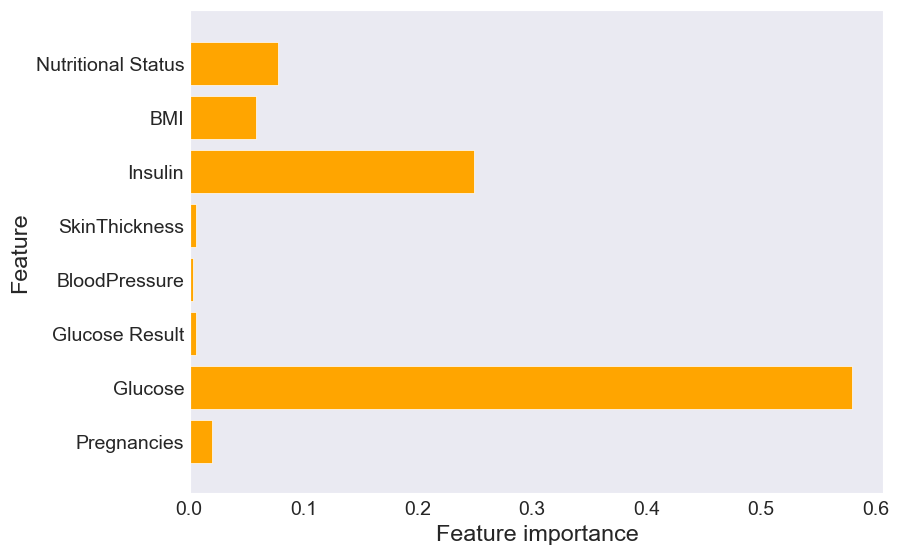

In [96]:
# **Now Lets visualize  the feature importances

plot_feature_importances_diabetes(gb1)
plt.savefig('feature_importance')

**We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight almost to all of the features in this case.**

### 5.6 : Support Vector Machine Model

In [97]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.76


**The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.** <br>
>SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale

**Rescale All Features**

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.80


**Scaling the data made a huge difference!**
> Now we are actually in an underfitting, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [99]:
# Lets Try to increasing C and check the result.
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.724


**Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.**

### 5.7: Neural Networks Model


In [100]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


**The accuracy of the MLP is not as good as the other models at all, this is likely due to scaling of the data. 
Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1.**

**We must rescale our data so that it fulfills these requirements.**

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


**The results are much better after scaling. As at matter of fact, we have obtained the highest test accuracy so far.**